In [ ]:
import os

def load_reviews(directory):
    texts = []
    labels = []
    for label_type in ['neg', 'pos']:
        folder_path = os.path.join(directory, label_type)
        for filename in os.listdir(folder_path):
            if filename.endswith(".txt"):
                file_path = os.path.join(folder_path, filename)
                with open(file_path, encoding='utf-8') as f:
                    texts.append(f.read())
                labels.append(0 if label_type == 'neg' else 1)
    return texts, labels

train_dir = 'D:/GeakMinds Internship/real world projects/datasets/aclImdb_v1/train'
texts, labels = load_reviews(train_dir)

print(f"Loaded {len(texts)} reviews.")
print(f"Example review:\n{texts[0][:500]}")
print(f"Label: {'positive' if labels[0] == 1 else 'negative'}")


Loaded 25000 reviews.
Example review:
Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's bette
Label: negative


In [1]:
texts

NameError: name 'texts' is not defined

In [6]:
test_dir = r'D:\GeakMinds Internship\real world projects\datasets\aclImdb_v1\test'
test_texts, test_labels = load_reviews(test_dir)

print(f"Loaded {len(test_texts)} test reviews.")


Loaded 25000 test reviews.


In [7]:
print(f"Example review:\n{test_texts[0][:500]}")
print(f"Label: {'positive' if test_labels[0] == 1 else 'negative'}")

Example review:
Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better 
Label: negative


In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize

# Download required resources
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\mutte\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\mutte\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\mutte\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\mutte\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\mutte\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipp

True

In [10]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):

    text = BeautifulSoup(text, "html.parser").get_text()

    text = text.lower()

    text = re.sub(r'[^a-z\s]', '', text)

    tokens = word_tokenize(text)

    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and len(w) > 1]
    
    return " ".join(tokens)


In [11]:
X_train = [preprocess_text(text) for text in texts]
X_test = [preprocess_text(text) for text in test_texts]

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec,labels)
preds = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(test_labels, preds))
print(classification_report(test_labels, preds, target_names=["Negative", "Positive"]))


Accuracy: 0.88288
              precision    recall  f1-score   support

    Negative       0.89      0.88      0.88     12500
    Positive       0.88      0.89      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



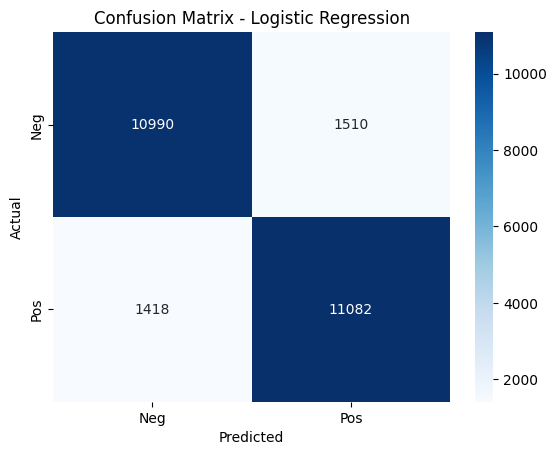

In [17]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(test_labels, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [27]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_vec, labels)
svm_preds = svm.predict(X_test_vec)
print("SVM Accuracy:", accuracy_score(test_labels, svm_preds))



C:\Users\mutte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVM Accuracy: 0.8692


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_vec, labels)
rf_preds = rf.predict(X_test_vec)
print("Random Forest Accuracy:", accuracy_score(test_labels, rf_preds))


Random Forest Accuracy: 0.84768
